# Session 3 - Python and Excel
This session looks at ways of using Python to interact with Excel. We have four different libraries featured here, but we will focus on [XLwings](https://www.xlwings.org/).
* XLwings - the most full-featured library
* OpenPyXL - a Python library to read/write Excel 2010 xlsx/xlsm/xltx/xltm files
* XLSXwriter - only includes writer
* xlrd - only includes reader

You may want to try different ones out. Some are faster, and some are more full-featured.

There is also an Excel reader and writer included in the Pandas library which we will look at later, and which uses the `openpyxl` library unless you specify otherwise.

## XLwings

This workbook uses xlwings (https://www.xlwings.org/) to manipulate spreadsheets. XLwings has two ways of interacting with Excel"
1. Direct manipulation from Python
2. Calling Python functions and process from Excel (with a special Excel add-in)

We will start by looking at direct manipulation of Excel spreadsheets from Python. 

![Image from xlwings.org](Resources\ExcelImages\xlwings_landingpage.png)

### Python and the xlwings library

There are some key aspects to be aware of:
* XLwings can create and open Excel workbooks
* Once documents are open, XLwings can read and write to them and can extract metadata
* When accessing workbooks from Python there is no need for the workbook to have the XLwings ribbon tab or have any special xlwings metadata

You can start by opening the spreadsheet "Excel-Python_comparison.xlsx, and then running the code below, or simply run the code without opening the workbook. 

You may want to make reference to the [quickstart documentation](https://docs.xlwings.org/en/stable/quickstart.html).

In [2]:
# Start by importing the library
import xlwings as xw

We can open the workbook and identify the worksheet we want to access. If you want to open a new workbook, then you can use the command `wb = xw.Book()`

In [3]:
wb = xw.Book(r'Excel-Python_comparison.xlsx')  # connect to an existing file in the current working directory

sht_1 = wb.sheets['Scratch']  # wb is a variable that points to the workbook instance we opened above

In [4]:
excel_data_1 = sht_1.range("A1:B4").value
excel_data_1

[['Some Data', None], ['a', 43.0], ['b', 48.0], ['c', 34.0]]

In [5]:
# As an example, we can use tuple-unpacking to extract the important data ('_' is a placeholder for unwanted data)
((_,_),(_,a),(_,b),(_,c)) = excel_data_1
print('a is {}'.format(a))
print('b is {}'.format(b))
print('c is {}'.format(c))

a is 43.0
b is 48.0
c is 34.0


We can also write data to the same worksheet

In [6]:
sht_1.range("D2:E3").value = [[2,5],[3.2,6.4]]

In [7]:
# This writes a value into a cell and adds a standard Excel function into the neighbouring cell.
sht_1.range('A6').value = 7
sht_1.range('B6').value = "=SQRT(A6)"

We can also read data from the active worksheet without specifying the workbook and spreadsheet by using a simple command (similar for writing)

In [8]:
excel_data_2 = xw.Range("A1:E4").value  # note the upper-case 'R' in 'xw.Range'
excel_data_2

[['Some Data', None, None, None, None],
 ['a', 43.0, None, 2.0, 5.0],
 ['b', 48.0, None, 3.2, 6.4],
 ['c', 34.0, None, None, None]]

We can look at a more sophisticated example as well - we can import data from Excel, then plot it in Python and send it back to Excel. For this we should go to the 'ArrayData' worksheet.

In [9]:
sht_2 = wb.sheets['ArrayData']
sht_2.activate()
excel_data_3 = sht_2.range("A1:D26").value  # note the lower-case 'r' in 'sht_2.range'
excel_data_3

[[0.0, 0.0, 1.0, 0.6],
 [0.1, 0.3090169943749474, 0.9510565162951535, 0.6090169943749474],
 [0.2, 0.5877852522924731, 0.8090169943749475, 0.42052429754195775],
 [0.30000000000000004,
  0.8090169943749475,
  0.587785252292473,
  0.1381966011250105],
 [0.4, 0.9510565162951535, 0.30901699437494745, -0.10498759010690695],
 [0.5, 1.0, 6.1257422745431e-17, -0.19999999999999996],
 [0.6000000000000001,
  0.9510565162951535,
  -0.30901699437494756,
  -0.10498759010690689],
 [0.7000000000000001,
  0.8090169943749475,
  -0.587785252292473,
  0.1381966011250105],
 [0.8, 0.5877852522924732, -0.8090169943749473, 0.42052429754195764],
 [0.9, 0.3090169943749475, -0.9510565162951535, 0.6090169943749474],
 [1.0, 1.22514845490862e-16, -1.0, 0.6],
 [1.1, -0.30901699437494773, -0.9510565162951535, 0.36180339887498913],
 [1.2000000000000002,
  -0.5877852522924734,
  -0.8090169943749472,
  -0.04970390429202126],
 [1.3, -0.8090169943749473, -0.5877852522924732, -0.5090169943749472],
 [1.4000000000000001,
  -0

In [10]:
# We can extract the data into four lists for plotting
x, y1, y2, y3 = zip(*excel_data_3)

In [11]:
# Here we are using matplotlib again
import matplotlib.pyplot as plt
%matplotlib widget
# If this fails, try 'inline' instead
# %matplotlib inline


Text(0.5, 1.0, 'Simple Plot')

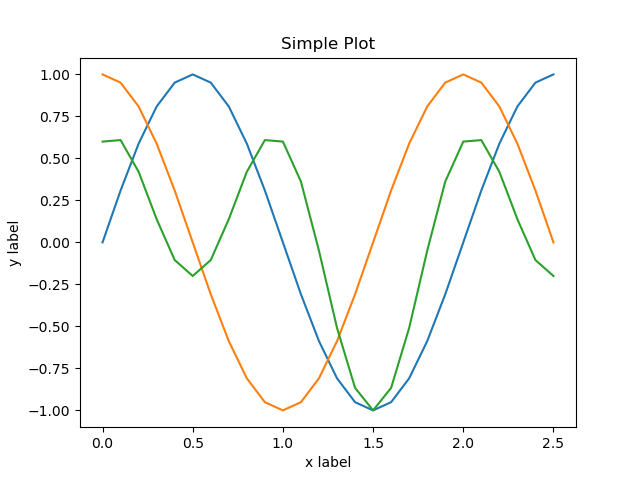

In [14]:
# Note that the approach is slightly different as we are defining a variable ('fig') to be equal to the plot
# and we are defining some new variables to define the axes
fig = plt.figure()    # this is the overall figure
fig.set_label('Figure Name')
axes_1 = fig.add_subplot(111)  # this is the axes definition (we could add more than one and create a matrix of axes)

# Plotting the data...
axes_1.plot(x, y1, '-', x, y2, '-', x, y3, '-')

# Set some decoration
axes_1.set_xlabel('x label')
axes_1.set_ylabel('y label')
axes_1.set_title("Simple Plot")

# fig.show()    # This is not needed for Jupyter - uncomment if chart does not appear.

# fig, ax = plt.subplots(1,1)  #-- this is a single-line alternative to the 'fig =' & 'axes_1 =' lines above

In [15]:
# We can send this plot off to Excel
sht_2.pictures.add(fig, name = "Waves", update = True)

# If we want to acces the active sheet, then we can use the following:
#xw.sheets.active.pictures.add(fig, name = "Waves", update = True)

<Picture 'Waves' in <Sheet [Excel-Python_comparison.xlsx]ArrayData>>

While this may not seem all that impressive (snice Excel has its own plotting tools), the advantage is that MatPlotLib provides much more control over the plot generation, and you can carry out a lot of processing using Python before sending the figure back.

Here we have a simple modification where we plot three separate plots instead of one.

*(For more information on plotting with matplotlib, see the tutorials - https://matplotlib.org/tutorials/index.html)*

Text(0.5, 1.0, 'Plot 3')

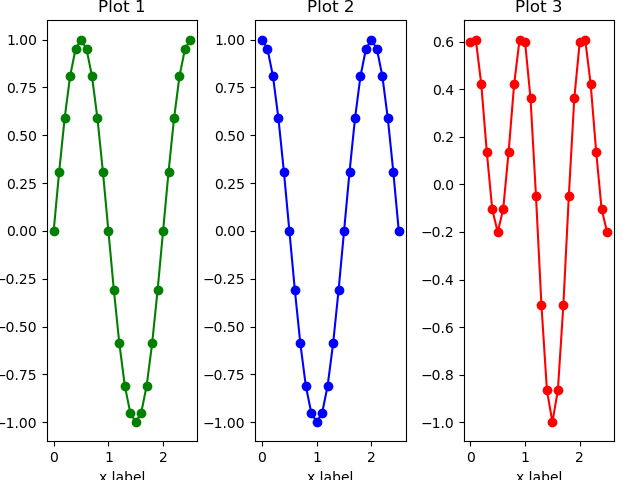

In [17]:
# We are using a shortcut for creating a figure with three subplots (each defined by an axes object)
fig_2, (ax_1, ax_2, ax_3) = plt.subplots(1,3)    # this is the overall figure (defined with 1 x 3 subplots)
fig_2.set_label('New Figure')
fig_2.tight_layout()

# Plotting the data to each axes object
ax_1.plot(x, y1, 'o-g')
ax_2.plot(x, y2, 'o-b')
ax_3.plot(x, y3, 'o-r')

ax_1.set_xlabel('x label')
ax_1.set_ylabel('y label')
ax_1.set_title("Plot 1")
ax_2.set_xlabel('x label')
#ax_2.set_ylabel('y label')
ax_2.set_title("Plot 2")
ax_3.set_xlabel('x label')
#ax_3.set_ylabel('y label')
ax_3.set_title("Plot 3")

# fig_2.show()    # This is not needed for Jupyter - uncomment if chart does not appear.

In [18]:
# We can also send this one off to Excel
sht_2.pictures.add(fig_2, name = "TriWave", update = True)

#xw.sheets.active.pictures.add(fig_2, name = "TriWave", update = True)

<Picture 'TriWave' in <Sheet [Excel-Python_comparison.xlsx]ArrayData>>

In [19]:
# If we want to, we can also save the plot to a file
fig_2.savefig('TriWave.png')

### XLwings tab in Excel

We are now going to look at the ways that XLwings provides of running Python processes from Excel. XLwings includes an add-in to Excel that provides a tab to the Excel ribbon. In order to use this, you need to install the add-in and you need to use it with workbooks that have special embedded code.

![title](Resources\ExcelImages\xlwings_tab.png)

### Installing the Excel Add-in

To install the xlwings Excel addin you can follow these steps by typing into the command-line. To bring up a console window, go to the Start Menu and type 'prompt' (without the quotes). Choose the 'CMD Prompt' option. You should then navigate your way to the folder you want to use as the enclosing folder for your XLwings spreadsheet and code. I recommend going to your Documents folder. You can either type the following commands into your console, or you can use the Python code below to get you there.

>`cd %HOMEPATH%\Documents`

NOTE: A set of instructions are available in the [online documentation](http://docs.xlwings.org/en/stable/addin.html).

In [ ]:
# The following lines will open a console for installing 
import os
# Uncomment one of the two following commands to open up a command window

# Uncomment next line to open in your Documents folder
#os.system("start /B start cmd.exe @cmd /k cd %HOMEPATH%\Documents")

# Uncomment next line to open in your H: drive and create an xltest folder
os.system(r"start /B start cmd.exe @cmd /k cd /d H:\ && mkdir H:\xltest")
# -- then type   cd xltest

To install the addin, first of all close all instances of Excel, then type: 
>`xlwings addin install`

*NB If you ever want to uninstall it, then replace the 'install' with 'remove': *
>`xlwings addin remove`

You will also need to make sure that you have an Excel macro workbook that contains the xlwings macros. This can be generated from the command line (make sure you are in the directory you want to create the files in):
>`xlwings quickstart myproject`

This will create a subdirectory called "myproject" in the current directory, containing two files, "myproject.py" and "myproject.xlsm". You may need to 'Import functions' from the xlwings tab in Excel.

Open the spreadsheet and you will find that there is an extra tab in the ribbon.

If you are opening a workbook that you created using quickstart, then everything is ready. If not, then in order to use RunPython or UDFs in a workbook, you need to set a reference to xlwings in the VBA editor, as in the screenshot below (Windows: Tools > References... *\[For MacOS: it’s on the lower left corner of the VBA editor\])*. 
![VBA Editor Reference to XLWings](Resources\ExcelImages\vba_reference.png)

You may need to search and browse to find the XLAM file (xlwings.xlam):
`C:\ProgramData\Anaconda3\Lib\site-packages\xlwings\addin`

We can now start to look at some of the things that we can now do.

### User-Defined Functions
We now need to open both the Excel file and the Python file that are in the new directory. You should probably open the Python file in Spyder. You may want to put the windows side by side.

You may want to make reference to the [online documentation on UDFs in XLwings](https://docs.xlwings.org/en/stable/udfs.html).

We will start by copying and pasting the following code into the Python file:

```python
import xlwings as xw

@xw.func
def double_sum(x, y):
    """Returns twice the sum of the two arguments"""
    return 2 * (x + y)


@xw.sub
def my_macro():
    """Writes the name of the Workbook into Range("A1") of Sheet 1"""
    wb = xw.Book.caller()
    wb.sheets[0].range('A1').value = wb.name
```

We can then open Excel and 'Import Functions' using the button on the ribbon. 

Once the functions have been imported, we can type in equations that use these UDFs.

We can also modify the function and reimport it.

### Macros defined in Python
Finally, we can type Alt-F8 (Run Macros) and we will see that 'my_macro' is present in the menu. THis will write the name of the workbook into Range A1 of the first sheet of the workbook.


For more information, view the videos on the [xlwings.org website](https://xlwings.org) and [read the documentation](https://docs.xlwings.org/en/stable/index.html).

### References
* http://docs.xlwings.org/en/stable/index.html
* http://docs.xlwings.org/en/stable/api.html
* https://media.readthedocs.org/pdf/fzumstein/stable/fzumstein.pdf

# Information on other tools for accessing Excel
We will not be looking at these today, but you can look at them later if you are interested.

## xlrd & xlwt
These libraries are for interacting with _old-format_ Excel files (**xls**):
- reading data and formatting information (`xlrd` library)
- writing data and formatting information (`xlwt` library)

* [Web-site for xlrd](https://github.com/python-excel/xlrd) - for ***reading*** XLS and XLSX files
* [Documentation for xlrd](https://xlrd.readthedocs.io/en/latest/)
* [Web-site for xlwt](https://github.com/python-excel/xlrd) - for ***writing*** XLS files only (MS Excel 97/2000/XP/2003)
* [Documentation for xlwt](https://xlwt.readthedocs.io/en/latest/)

In [23]:
import xlrd
book = xlrd.open_workbook("Test.xls")
print("The number of worksheets is {0}".format(book.nsheets))
print("Worksheet name(s): {0}".format(book.sheet_names()))
sh = book.sheet_by_index(0)
print("{0} {1} {2}".format(sh.name, sh.nrows, sh.ncols))
print("Cell D30 is {0}".format(sh.cell_value(rowx=29, colx=3)))
for rx in range(sh.nrows):
    print(sh.row(rx))

The number of worksheets is 3
Worksheet name(s): ['ArrayData', 'NoData', 'SomeData']
ArrayData 36 4
Cell D30 is -0.32491969623290473
[number:0.0, number:0.0, number:1.0, number:0.0]
[number:0.1, number:0.3090169943749474, number:0.9510565162951535, number:0.3249196962329063]
[number:0.2, number:0.5877852522924731, number:0.8090169943749475, number:0.7265425280053609]
[number:0.30000000000000004, number:0.8090169943749475, number:0.587785252292473, number:1.3763819204711738]
[number:0.4, number:0.9510565162951535, number:0.30901699437494745, number:3.0776835371752527]
[number:0.5, number:1.0, number:6.1257422745431e-17, number:1.6324552277619072e+16]
[number:0.6000000000000001, number:0.9510565162951535, number:-0.30901699437494756, number:-3.077683537175252]
[number:0.7000000000000001, number:0.8090169943749475, number:-0.587785252292473, number:-1.3763819204711738]
[number:0.8, number:0.5877852522924732, number:-0.8090169943749473, number:-0.726542528005361]
[number:0.9, number:0.3090

## XLSXwriter
This library only writes data to XLSX files - it cannot read data from Excel.

[XlsxWriter website](https://xlsxwriter.readthedocs.io/)

In [ ]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('temp_XLSX.xlsx')
worksheet = workbook.add_worksheet()

# Some data we want to write to the worksheet.
expenses = (
    ['Rent', 1000],
    ['Gas',   100],
    ['Food',  300],
    ['Gym',    50],
)

# Start from the first cell. Rows and columns are zero indexed.
row = 0
col = 0

# Iterate over the data and write it out row by row.
for item, cost in (expenses):
    worksheet.write(row, col,     item)
    worksheet.write(row, col + 1, cost)
    row += 1

# Write a total using a formula.
worksheet.write(row, 0, 'Total')
worksheet.write(row, 1, '=SUM(B1:B4)')

workbook.close()

## OpenPyXL
[OpenPyXL website](https://openpyxl.readthedocs.io/en/stable/)

In [ ]:
#from openpyxl import Workbook
#wb = Workbook()

# grab the active worksheet
#ws = wb.active

from openpyxl import load_workbook
wb = load_workbook(filename = 'Test.xlsx')
ws1 = wb['ArrayData']
print(ws1['D18'].value)

# Data can be assigned directly to cells
ws2 = wb.create_sheet('OutData')
ws2['A1'] = 42

# Rows can also be appended
ws2.append([1, 2, 3])

# Python types will automatically be converted
import datetime
ws2['A2'] = datetime.datetime.now()

# Save the file
wb.save("temp_OpenPyXL.xlsx")

## References
* xlwings website (good video introductions) - https://www.xlwings.org/
* Quickstart guide - http://docs.xlwings.org/en/stable/quickstart.html
* UDF quickstart guide - http://docs.xlwings.org/en/stable/quickstart.html#udfs-user-defined-functions-windows-only
* UDF Detailed Guide - http://docs.xlwings.org/en/stable/udfs.html#udfs
* Syntax overview - http://docs.xlwings.org/en/stable/syntax_overview.html

## Additional Information on Interaction with Windows

In [1]:
# Running a directory command a receiving the results
from subprocess import check_output
results = []
results.append(check_output("dir", shell=True).decode())
results.append(check_output("dir %HOMEPATH%", shell=True).decode())
ignore = [print(result) for result in results]

 Volume in drive C is Windows 
 Volume Serial Number is D42C-6BC0

 Directory of c:\Users\andrew.mole\Documents\GitHub\python_training_notebooks_pub\notebooks\python_fundamentals

15/12/2023  11:27 am    <DIR>          .
15/02/2023  03:25 pm    <DIR>          ..
14/12/2023  03:01 pm    <DIR>          .ipynb_checkpoints
03/10/2018  09:16 am                70 data1.csv
03/10/2018  09:18 am                75 data2.csv
03/10/2018  09:08 am               697 data3.csv
03/10/2018  09:13 am               425 data4.csv
15/10/2018  10:47 am             1,003 data7.csv
10/08/2018  11:47 am             6,144 doubleMe.dll
10/08/2018  12:07 pm               196 doubleMe.py
07/10/2018  01:42 am            39,374 Excel-Python_comparison.xlsx
10/10/2018  10:51 pm               115 file.txt
18/10/2018  12:31 pm    <DIR>          Grapher
23/05/2019  05:01 pm           238,049 IZT_TH.csv
18/10/2018  12:31 pm    <DIR>          pyButtons
25/10/2018  12:29 pm    <DIR>          Pyside2 Example
11/10/2018  10